# Определение перспективного тарифа для телеком компании

## Оглавление
* [Загрузка данных и общая информация](#first-bullet)
* [Предобработка данных](#second-bullet)
* [Анализ данных](#third-bullet)
* [Проверка гипотез](#fourth-bullet)
* [Общий вывод](#fifth-bullet)

In [77]:
# Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

In [78]:
pd.options.display.float_format = '{:.4f}'.format #форматируем вывод данных float на экран

## Загрузка данных и общая информация <a class="anchor" id="first-bullet"></a>

In [79]:
# Функция для просмотра общей информации
def total_info(data):
    print('Первые 5 строк таблицы')
    display(data.head())
    print()
    print('Общая информация о таблице')
    display(data.info())
    print()
    print('Показатели математической статистики')
    display(data.describe())

In [80]:
calls = pd.read_csv('/datasets/calls.csv')
total_info(calls)

Первые 5 строк таблицы


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0000,1000
1,1000_1,2018-08-17,0.0000,1000
2,1000_2,2018-06-11,2.8500,1000
3,1000_3,2018-09-21,13.8000,1000
4,1000_4,2018-12-15,5.1800,1000



Общая информация о таблице
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None


Показатели математической статистики


,duration,user_id
count,202607.0000,202607.0000
mean,6.7559,1253.9406
std,5.8434,144.7228
min,0.0000,1000.0000
25%,1.3000,1126.0000
50%,6.0000,1260.0000
75%,10.7000,1379.0000
max,38.0000,1499.0000


In [81]:
print('Количество звонков с длительностью 0 секунд: {:.1%}'.format(len(calls[calls['duration'] == 0]) / len(calls)))

Количество звонков с длительностью 0 секунд: 19.6%


В таблице 202607 строк, пропусков в столбцах нет, требуется преобразование данных в дату в столбце `call_date`. Столбец с `id` звонка в анализе не понадобится, поэтому преобразовывать тип данных в нем не будем.

Также в таблице каждый пятый звонок с длительностью 0 секунд, возможно это пропущенные звонки, когда клиент не смог дозвониться. 

In [82]:
internet = pd.read_csv('/datasets/internet.csv')
total_info(internet)

Первые 5 строк таблицы


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.9500,2018-11-25,1000
1,1,1000_1,1052.8100,2018-09-07,1000
2,2,1000_2,1197.2600,2018-06-25,1000
3,3,1000_3,550.2700,2018-08-22,1000
4,4,1000_4,302.5600,2018-09-24,1000



Общая информация о таблице
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None


Показатели математической статистики


,Unnamed: 0,mb_used,user_id
count,149396.0000,149396.0000,149396.0000
mean,74697.5000,370.1924,1252.0998
std,43127.0547,278.3010,144.0508
min,0.0000,0.0000,1000.0000
25%,37348.7500,138.1875,1130.0000
50%,74697.5000,348.0150,1251.0000
75%,112046.2500,559.5525,1380.0000
max,149395.0000,1724.8300,1499.0000


In [83]:
print('Количество сессий без использования трафика: {:.1%}'.format(len(internet[internet['mb_used'] == 0]) / len(internet)))

Количество сессий без использования трафика: 13.1%


В таблице 149396 строк, пропусков в столбцах нет, требуется преобразование данных в дату в столбце `session_date`. Столбец с `id` в анализе не понадобится, поэтому преобразовывать тип данных в нем не будем.

В таблице 13% сессий без использования интернет трафика, скорее всего произошел разрыв связи.

Столбец `Unnamed` не содержит ценной информации, дублирует индекс таблицы, этот столбец будет удaлен на этапе предобработки данных.

In [84]:
messages = pd.read_csv('/datasets/messages.csv')
total_info(messages)

Первые 5 строк таблицы


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000



Общая информация о таблице
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None


Показатели математической статистики


,user_id
count,123036.0000
mean,1256.9894
std,143.5240
min,1000.0000
25%,1134.0000
50%,1271.0000
75%,1381.0000
max,1499.0000


В таблице 123036 строк, пропусков в столбцах нет, требуется преобразование данных в дату в столбце `message_date`. Столбец с `id` в анализе не понадобится, поэтому преобразовывать тип данных в нем не будем.

In [85]:
tariffs = pd.read_csv('/datasets/tariffs.csv')
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [86]:
users = pd.read_csv('/datasets/users.csv')
total_info(users)

Первые 5 строк таблицы


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra



Общая информация о таблице
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None


Показатели математической статистики


,user_id,age
count,500.0000,500.0000
mean,1249.5000,46.5880
std,144.4818,16.6676
min,1000.0000,18.0000
25%,1124.7500,32.0000
50%,1249.5000,46.0000
75%,1374.2500,62.0000
max,1499.0000,75.0000


In [87]:
len(users['user_id'].unique())

500

В таблице содержится информация о 500 пользователях, часть из них (38 человек) перестали пользоваться тарифом компании (заполнен столбец с `churn_date`). Поскольку нет одинаковых user_id можно предположить, что 38 человек после ухода с тарифа полностью перестали пользоваться услугами компании. В таблице требуется преобразование столбцов `reg_date` и `churn_date` в формат даты.

In [88]:
calls.describe()

,duration,user_id
count,202607.0000,202607.0000
mean,6.7559,1253.9406
std,5.8434,144.7228
min,0.0000,1000.0000
25%,1.3000,1126.0000
50%,6.0000,1260.0000
75%,10.7000,1379.0000
max,38.0000,1499.0000


## Предобработка данных <a class="anchor" id="second-bullet"></a>

In [89]:
# Преобразовываем столбцы с датами в формат даты. 
# Сразу преобразуем к формату "год-месяц", поскольку далее предполагается аналих данных в помесячной разбивке
calls['call_date'] = pd.to_datetime(calls['call_date'],format='%Y-%m-%d').astype('datetime64[M]')
internet['session_date'] = pd.to_datetime(internet['session_date'],format='%Y-%m-%d').astype('datetime64[M]')
messages['message_date'] = pd.to_datetime(messages['message_date'],format='%Y-%m-%d').astype('datetime64[M]')
users['churn_date'] = pd.to_datetime(users['churn_date'],format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'],format='%Y-%m-%d')

In [90]:
# Удаляем лишний столбец `Unnamed: 0`
internet = internet.drop(['Unnamed: 0'], axis=1)

In [91]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


In [92]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.6+ MB


In [93]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


In [94]:
d1 = (calls['call_date'].value_counts().to_frame().reset_index().sort_values('index')
        .merge(internet['session_date'].value_counts().to_frame().reset_index().sort_values('index'), on='index')
     )
d2 = d1.merge(messages['message_date'].value_counts().to_frame().reset_index().sort_values('index'), on='index')
d2.style.hide_index()

index,call_date,session_date,message_date
2018-01-01 00:00:00,1476,1117,924
2018-02-01 00:00:00,3328,2641,1924
2018-03-01 00:00:00,6687,4885,3648
2018-04-01 00:00:00,9272,6511,5179
2018-05-01 00:00:00,12647,9408,7298
2018-06-01 00:00:00,14716,11057,8983
2018-07-01 00:00:00,18298,13548,11320
2018-08-01 00:00:00,21488,16092,13088
2018-09-01 00:00:00,24061,17512,14759
2018-10-01 00:00:00,27146,20009,17114


In [95]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


Столбцы преобразованы к формату даты, данные в таблицах `calls`, `internet`, `messages` содержат данные за 2018 год

Поскольку оператор связи всегда округляет данные по минутам и мегабайтам вверх, округлим данные в столбцах `duration`, `mb_used` вверх. Поскольку в данных столбцах есть нулевые данные в рамках данного анализа сделаем предположение, что оператор огруглит 0 в сторону 1.

In [96]:
calls['duration_round'] = np.floor(calls['duration']) + 1
internet['mb_used_round'] = np.floor(internet['mb_used']) + 1

In [97]:
calls.sample(5)

,id,call_date,duration,user_id,duration_round
89410,1224_327,2018-11-01,5.0200,1224,6.0000
180295,1451_169,2018-12-01,15.1600,1451,16.0000
119724,1309_150,2018-11-01,0.0000,1309,1.0000
201762,1496_584,2018-02-01,4.7000,1496,5.0000
11911,1031_92,2018-12-01,8.3600,1031,9.0000


In [98]:
internet.sample(5)

,id,mb_used,session_date,user_id,mb_used_round
58730,1197_365,577.1100,2018-07-01,1197,578.0000
107706,1366_61,0.4500,2018-09-01,1366,1.0000
83630,1283_221,916.2600,2018-12-01,1283,917.0000
136034,1456_183,302.4700,2018-09-01,1456,303.0000
23471,1079_74,530.5400,2018-11-01,1079,531.0000


In [99]:
calls[['duration','duration_round']].describe()

,duration,duration_round
count,202607.0000,202607.0000
mean,6.7559,7.3613
std,5.8434,5.7354
min,0.0000,1.0000
25%,1.3000,2.0000
50%,6.0000,7.0000
75%,10.7000,11.0000
max,38.0000,39.0000


In [100]:
internet[['mb_used','mb_used_round']].describe()

,mb_used,mb_used_round
count,149396.0000,149396.0000
mean,370.1924,370.7622
std,278.3010,278.2142
min,0.0000,1.0000
25%,138.1875,139.0000
50%,348.0150,349.0000
75%,559.5525,560.0000
max,1724.8300,1725.0000


После округления вверх значении в столбцах с длительностю разговоров и количеством использованного интернет траика значения ожидаемо сместились в большую сторону.

In [101]:
# Создаем таблицу, которая в дальнейшем будет заполняться данными
# Таблица будет содержать всех пользователей и месяца, 
# т.е. ее размер первоначально будет 500 (число пользователей в выборке) * 12 (число месяцев в 2018 году) = 6000
d3 = pd.DataFrame(pd.date_range(calls['call_date'].min(),calls['call_date'].max(),freq='MS'))
d3.columns = ['month']
d3['key'] = 1
users['key'] = 1
data = users.merge(d3, on='key')
data.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,key,month
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1,2018-01-01
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1,2018-02-01
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1,2018-03-01
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1,2018-04-01
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1,2018-05-01


In [102]:
len(data)

6000

Получили трубуемую таблицу. Убираем строки в которых дата регистрации пользователя позднее чем месяц в столбце `month` 

In [103]:
data['reg_month'] = data['reg_date'].values.astype('datetime64[M]')
data['churn_month'] = data['churn_date'].values.astype('datetime64[M]')
data = data[(data['month'] >= data['reg_month']) & ((data['month'] <= data['churn_month']) | (data['churn_date'].isna()))]
data.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,key,month,reg_month,churn_month
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1,2018-05-01,2018-05-01,NaT
5,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1,2018-06-01,2018-05-01,NaT
6,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1,2018-07-01,2018-05-01,NaT
7,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1,2018-08-01,2018-05-01,NaT
8,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1,2018-09-01,2018-05-01,NaT


In [104]:
len(data)

3216

In [105]:
# Объединяем все данные в общую таблицу
calls_group = calls.groupby(['user_id','call_date']).agg({'duration_round':'sum'}).reset_index()
calls_group.columns = ['user_id','month','duration_round']
internet_group = internet.groupby(['user_id','session_date']).agg({'mb_used_round':'sum'}).reset_index()
internet_group.columns = ['user_id','month','mb_used_round']
messages_group = messages.groupby(['user_id','message_date']).agg({'id':'count'}).reset_index()
messages_group.columns = ['user_id','month','sms']
data = data.merge(calls_group, how='left', on=['user_id','month'])
data = data.merge(internet_group, how='left', on=['user_id','month'])
data = data.merge(messages_group, how='left', on=['user_id','month'])
data[data['user_id'] == 1498]

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,key,month,reg_month,churn_month,duration_round,mb_used_round,sms
3208,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,1,2018-07-01,2018-07-01,2018-10-01,178.0000,7488.0000,20.0000
3209,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,1,2018-08-01,2018-07-01,2018-10-01,414.0000,24282.0000,62.0000
3210,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,1,2018-09-01,2018-07-01,2018-10-01,477.0000,22188.0000,44.0000
3211,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,1,2018-10-01,2018-07-01,2018-10-01,259.0000,20614.0000,42.0000


In [106]:
# Добавляем данные о тарифе
tariffs.rename(columns={'tariff_name' : 'tariff'}, inplace=True)
data = data.merge(tariffs, how='left', on='tariff')

In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 22 columns):
user_id                  3216 non-null int64
age                      3216 non-null int64
churn_date               189 non-null datetime64[ns]
city                     3216 non-null object
first_name               3216 non-null object
last_name                3216 non-null object
reg_date                 3216 non-null datetime64[ns]
tariff                   3216 non-null object
key                      3216 non-null int64
month                    3216 non-null datetime64[ns]
reg_month                3216 non-null datetime64[ns]
churn_month              189 non-null datetime64[ns]
duration_round           3174 non-null float64
mb_used_round            3203 non-null float64
sms                      2717 non-null float64
messages_included        3216 non-null int64
mb_per_month_included    3216 non-null int64
minutes_included         3216 non-null int64
rub_monthly_fee          3216 

По всей видимости есть пользователи, которые не пользуются одновременно всеми услугами оператора (звонки, СМС, интернет), проверим есть ли пользователи, которые вообще не пользовались какими либо услугами оператора за месяц.

In [108]:
# Заменяем пропуски на нули
data['duration_round'] = data['duration_round'].fillna(0)
data['mb_used_round'] = data['mb_used_round'].fillna(0)
data['sms'] = data['sms'].fillna(0)

In [109]:
data[(data['duration_round'] == 0) & (data['mb_used_round'] == 0) & (data['sms'] == 0)]

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,key,month,...,duration_round,mb_used_round,sms,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
827,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra,1,2018-12-01,...,0.0000,0.0000,0.0000,1000,30720,3000,1950,150,1,1
2335,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart,1,2018-12-01,...,0.0000,0.0000,0.0000,50,15360,500,550,200,3,3


Есть два клиента, которые подключились и отключились в одном месяце. В рамках данного анализа сделаем предположение, что оператор в любом случае списал с данных клиентов абонентскую плату за месяц.

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 22 columns):
user_id                  3216 non-null int64
age                      3216 non-null int64
churn_date               189 non-null datetime64[ns]
city                     3216 non-null object
first_name               3216 non-null object
last_name                3216 non-null object
reg_date                 3216 non-null datetime64[ns]
tariff                   3216 non-null object
key                      3216 non-null int64
month                    3216 non-null datetime64[ns]
reg_month                3216 non-null datetime64[ns]
churn_month              189 non-null datetime64[ns]
duration_round           3216 non-null float64
mb_used_round            3216 non-null float64
sms                      3216 non-null float64
messages_included        3216 non-null int64
mb_per_month_included    3216 non-null int64
minutes_included         3216 non-null int64
rub_monthly_fee          3216 

Рассчитаем доходы оператора, полученные от каждого клиента

In [111]:
def rev(row):
    revenue = 0
    revenue += row['rub_monthly_fee']
    if row['duration_round'] > row['minutes_included']:
        revenue += (row['duration_round'] - row['minutes_included']) * row['rub_per_minute']
    if row['mb_used_round'] > row['mb_per_month_included']:
        revenue += (np.ceil((row['mb_used_round'] - row['mb_per_month_included']) / 1024)) * row['rub_per_gb']
    if row['sms'] > row['messages_included']:
        revenue += (row['sms'] - row['messages_included']) * row['rub_per_message']
    return revenue
data['revenue'] = data.apply(rev, axis=1)
# Добавляем несколько вспомогательных столбцов для дальнейшего анализа
data['over_fee'] = data['revenue'] - data['rub_monthly_fee']
data['over_minutes'] = (data['duration_round'] > data['minutes_included']) * 1 * ((data['duration_round'] - data['minutes_included']))
data['over_mb'] = (data['mb_used_round'] > data['mb_per_month_included']) * 1 * (data['mb_used_round'] - data['mb_per_month_included'])
data['over_sms'] = (data['sms'] > data['messages_included']) * 1 * (data['sms'] - data['messages_included'])
# Просматриваем результат
data[['user_id','rub_monthly_fee','duration_round','minutes_included','over_minutes','mb_used_round','mb_per_month_included','over_mb','sms','messages_included','over_sms','revenue','over_fee']].tail()

,user_id,rub_monthly_fee,duration_round,minutes_included,over_minutes,mb_used_round,mb_per_month_included,over_mb,sms,messages_included,over_sms,revenue,over_fee
3211,1498,550,259.0000,500,-0.0000,20614.0000,15360,5254.0000,42.0000,50,-0.0000,1750.0000,1200.0000
3212,1499,550,71.0000,500,-0.0000,1849.0000,15360,-0.0000,11.0000,50,-0.0000,550.0000,0.0000
3213,1499,550,474.0000,500,-0.0000,17824.0000,15360,2464.0000,48.0000,50,-0.0000,1150.0000,600.0000
3214,1499,550,624.0000,500,124.0000,17994.0000,15360,2634.0000,59.0000,50,9.0000,1549.0000,999.0000
3215,1499,550,505.0000,500,5.0000,13082.0000,15360,-0.0000,66.0000,50,16.0000,613.0000,63.0000


Создана общая таблица для дальнейшего анализа данных.

## Анализ данных <a class="anchor" id="third-bullet"></a>

In [112]:
data.pivot_table(index=['tariff'], values=['duration_round','over_minutes'], aggfunc='mean')

,duration_round,over_minutes
tariff,,
smart,429.7148,47.4830
ultra,540.7677,0.0000


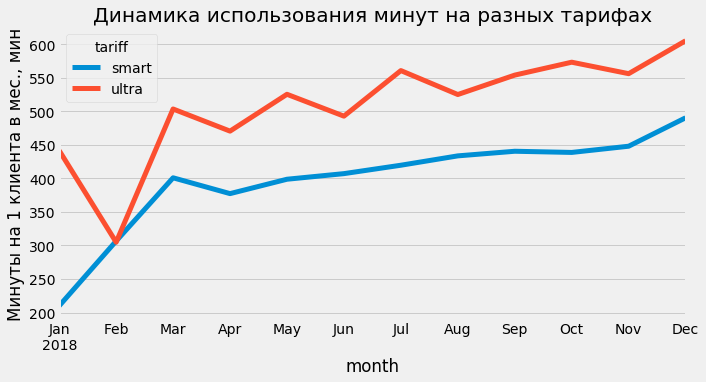

In [113]:
data.pivot_table(index='month', columns='tariff', values='duration_round', aggfunc='mean').plot(linewidth=5, figsize=(10,5))
plt.title('Динамика использования минут на разных тарифах')
plt.ylabel('Минуты на 1 клиента в мес., мин')
plt.style.use('fivethirtyeight')
plt.show()

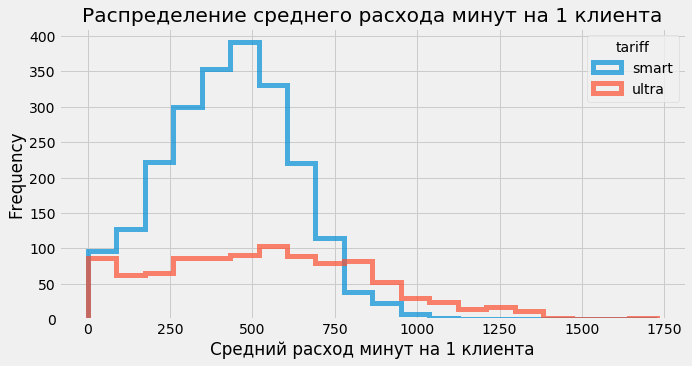

In [114]:
data.pivot_table(index=['user_id','month'], columns='tariff', values='duration_round', aggfunc='mean') \
    .plot(kind='hist', histtype='step', bins=20, linewidth=5, figsize=(10,5), alpha=0.7, label='smart', legend=True)
plt.xlabel('Средний расход минут на 1 клиента')
plt.title('Распределение среднего расхода минут на 1 клиента')
plt.show()

In [115]:
data.pivot_table(index=['tariff'], values=['duration_round'], aggfunc=['mean','median','var','std'])

,mean,median,var,std
,duration_round,duration_round,duration_round,duration_round
tariff,,,,
smart,429.7148,435.0000,38115.5041,195.2319
ultra,540.7677,532.0000,106480.7003,326.3138


Поскольку медианы и средние значения практически совпадают (по тарифу 'smart' небольшой скос влево, по тарифу 'ultra' небольшой скос в право), можно считать что мы имеем нормальное распределение. На тарифе smart данные меньше разбросаны относительно среднего (большинство значений распределено в диапозоне от 0 до 800 минут, при среднем значении 430 минут, три стандартных отклонения примерно в полтора раза превышает среднее значение), чем на тарифе ultra (стандартное отклонение относительно среднего значения высокое, на графике видно, что данные распределены на диапозоне от 0 до 1200 минут, три стандартных отклонения почти в два раза превышают среднее значение) 

In [116]:
data.pivot_table(index=['tariff'], values=['mb_used_round','over_mb'], aggfunc='mean')

,mb_used_round,over_mb
tariff,,
smart,16230.3372,2775.2287
ultra,19469.3114,754.3103


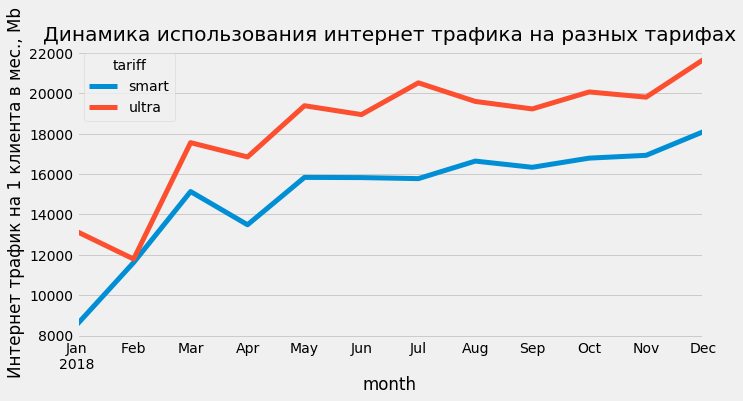

In [117]:
data.pivot_table(index='month', columns='tariff', values='mb_used_round', aggfunc='mean').plot(linewidth=5, figsize=(10,5))
plt.title('Динамика использования интернет трафика на разных тарифах')
plt.ylabel('Интернет трафик на 1 клиента в мес., Mb')
plt.style.use('fivethirtyeight')
plt.show()

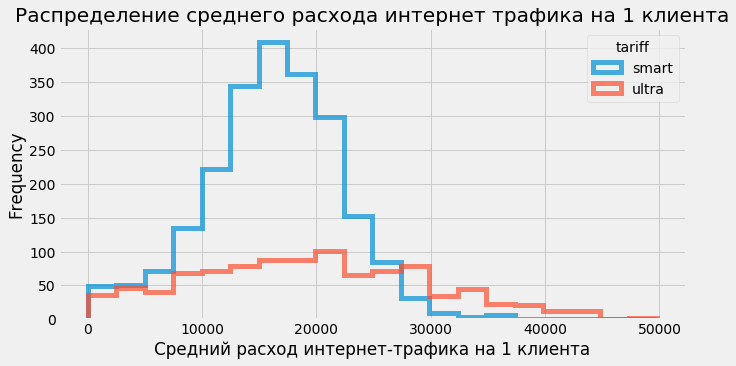

In [118]:
data.pivot_table(index=['user_id','month'], columns='tariff', values='mb_used_round', aggfunc='mean') \
    .plot(kind='hist', histtype='step', bins=20, linewidth=5, figsize=(10,5), alpha=0.7, label='smart', legend=True)
plt.xlabel('Средний расход интернет-трафика на 1 клиента')
plt.title('Распределение среднего расхода интернет трафика на 1 клиента')
plt.show()

In [119]:
data.pivot_table(index=['tariff'], values=['mb_used_round'], aggfunc=['mean','median','var','std'])

,mean,median,var,std
,mb_used_round,mb_used_round,mb_used_round,mb_used_round
tariff,,,,
smart,16230.3372,16538.0000,34676674.2290,5888.6904
ultra,19469.3114,19321.0000,102237336.6999,10111.2480


В истользовании интренет трафика также можно считать распреление нормальным (медиана и среднее значение близки)

In [120]:
data.pivot_table(index=['tariff'], values=['sms','over_sms'], aggfunc='mean')

,over_sms,sms
tariff,,
smart,5.7973,33.3691
ultra,0.0000,49.3134


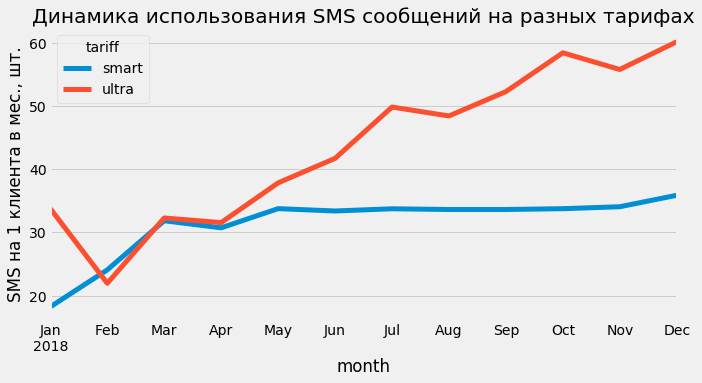

In [121]:
data.pivot_table(index='month', columns='tariff', values='sms', aggfunc='mean').plot(linewidth=5, figsize=(10,5))
plt.title('Динамика использования SMS сообщений на разных тарифах')
plt.ylabel('SMS на 1 клиента в мес., шт.')
plt.style.use('fivethirtyeight')
plt.show()

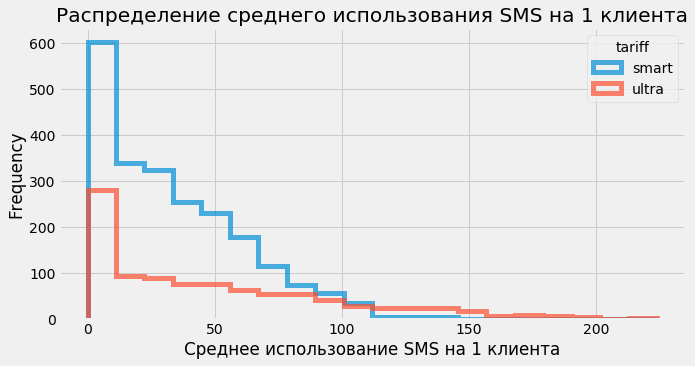

In [122]:
data.pivot_table(index=['user_id','month'], columns='tariff', values='sms', aggfunc='mean') \
    .plot(kind='hist', histtype='step', bins=20, linewidth=5, figsize=(10,5), alpha=0.7, label='smart', legend=True)
plt.xlabel('Среднее использование SMS на 1 клиента')
plt.title('Распределение среднего использования SMS на 1 клиента')
plt.show()

In [123]:
data.pivot_table(index=['tariff'], values=['sms'], aggfunc=['mean','median','var','std'])

,mean,median,var,std
,sms,sms,sms,sms
tariff,,,,
smart,33.3691,28.0000,796.9553,28.2304
ultra,49.3134,38.0000,2285.4174,47.8060


Исходя из графика видно, что достаточно большое количество клиентов не использует SMS сообщения, либо использует их незначительно. График существенно смещен вправо, смещение также подтверждает и то что среднее значение существенно больше медианы. Распределение не является нормальным.

In [124]:
data.pivot_table(index=['tariff'], values=['revenue','over_fee'], aggfunc='mean')

,over_fee,revenue
tariff,,
smart,762.9798,1312.9798
ultra,120.9432,2070.9432


Проанализируем какой доход в расчете на 1 клиента генерирует каждый из тарифов

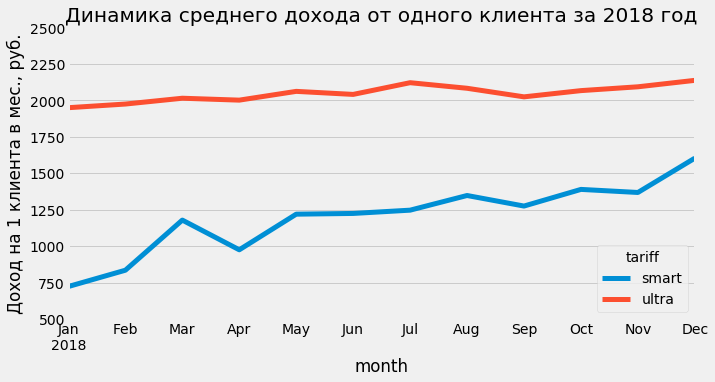

In [125]:
data.pivot_table(index='month', columns='tariff', values='revenue', aggfunc='mean').plot(linewidth=5, figsize=(10,5))
plt.title('Динамика среднего дохода от одного клиента за 2018 год')
plt.ylim(500,2500)
plt.ylabel('Доход на 1 клиента в мес., руб.')
plt.style.use('fivethirtyeight')
plt.show()

На графике видно, что средний доход на 1 киента на тарифе smart растет в течении год, в то время как на тарифе ultra он держится на одном уровне.

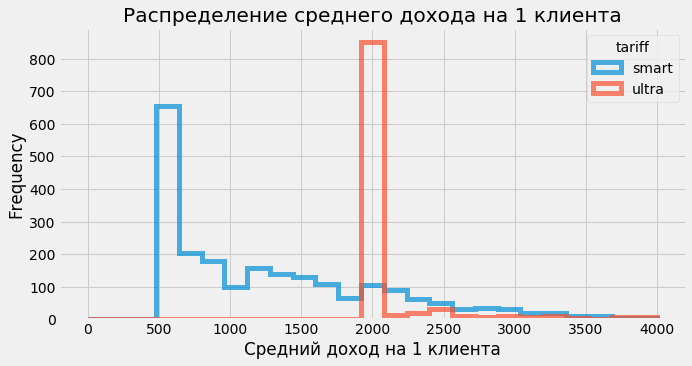

In [126]:
data.pivot_table(index=['user_id','month'], columns='tariff', values='revenue', aggfunc='mean') \
    .plot(kind='hist', histtype='step', range=(0, 4000), bins=25, linewidth=5, figsize=(10,5), alpha=0.7, label='smart', legend=True)
plt.xlabel('Средний доход на 1 клиента')
plt.title('Распределение среднего дохода на 1 клиента')
plt.show()

На тарифе смарт только небольшая часть клиентов укладывается в пакет услуг, включенных в тариф, при этом большинтсво клиентов доплачивают сверх пакета. На тарифе ultra обратная ситуация: клиенты в основном оплачивают только абонентскую плату и практически не выходят за пределы пакета услуг.

In [127]:
data.pivot_table(index=['tariff'], values=['revenue'], aggfunc=['mean','median','var','std'])

,mean,median,var,std
,revenue,revenue,revenue,revenue
tariff,,,,
smart,1312.9798,1077.0000,690964.8641,831.2430
ultra,2070.9432,1950.0000,143360.4293,378.6297


Распределение доходов на одного клиента также не является нормально распределенной величиной ввиду наличия абонентской платы на тарифах.

Проверим какая доля клиентов доплачивает сверх абонентской платы, и какую сумму в среднем они доплачивают.

In [128]:
data['min_over'] = data['over_minutes'] > 0
data['mb_over'] = data['over_mb'] > 0
data['sms_over'] = data['over_sms'] > 0
data['revenue_over'] = data['over_fee'] > 0

In [129]:
a1 = data[data['tariff'] == 'smart']['revenue_over'].mean()
a2 = data[data['tariff'] == 'ultra']['revenue_over'].mean()

<function matplotlib.pyplot.show(*args, **kw)>

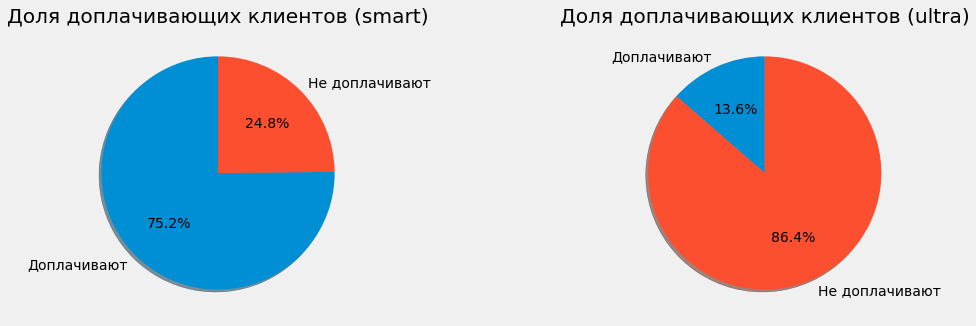

In [130]:
a = pd.DataFrame({'smart':[a1,1-a1], 'ultra':[a2,1-a2]}, index=['over','not_over'])
labels='Доплачивают','Не доплачивают'
fig,(ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,5))
ax1.pie(a['smart'], autopct='%1.1f%%', labels=labels, shadow=True, startangle=90)
ax1.set_title('Доля доплачивающих клиентов (smart)')
ax2.pie(a['ultra'], autopct='%1.1f%%', labels=labels, shadow=True, startangle=90)
ax2.set_title('Доля доплачивающих клиентов (ultra)')
plt.show

Проверим какой вид услуг в основном перелимичивают клиенты на исследуемых тарифах

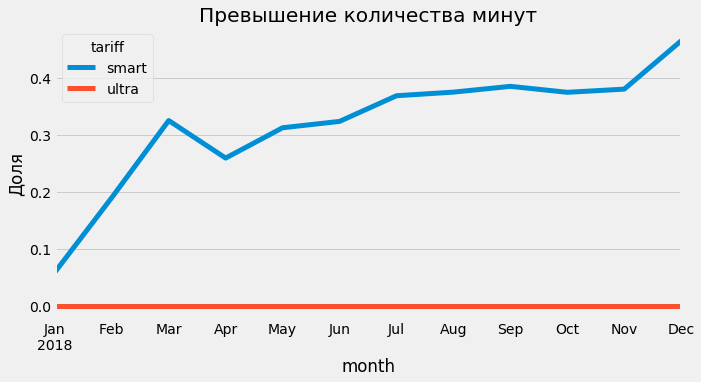

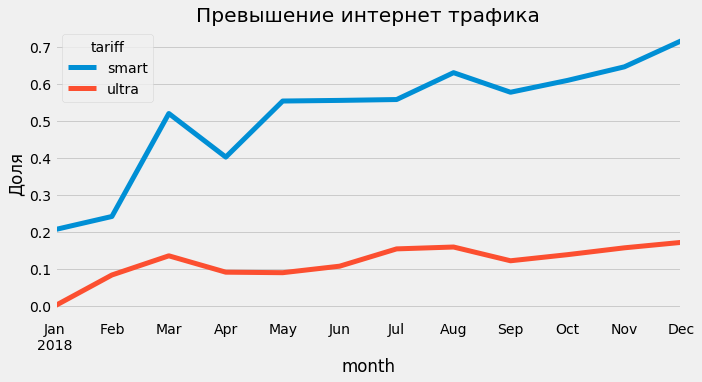

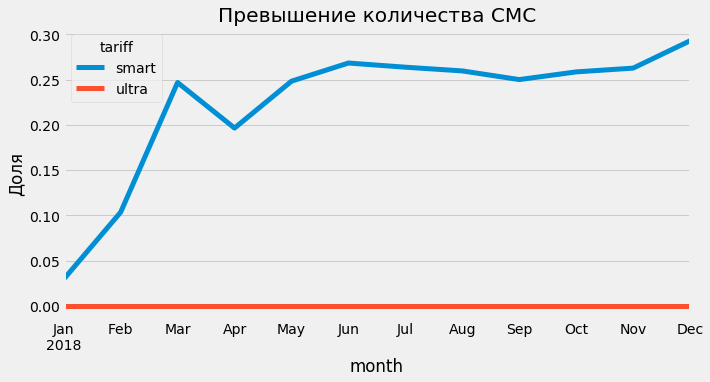

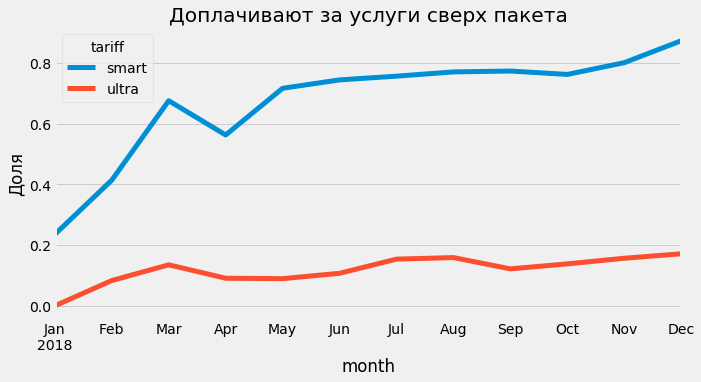

In [131]:
disc_title = {'min_over':'Превышение количества минут',
              'mb_over':'Превышение интернет трафика', 
              'sms_over':'Превышение количества СМС', 
              'revenue_over':'Доплачивают за услуги сверх пакета'}
for i in data.iloc[:,[27,28,29,30]].columns:
    data.pivot_table(index='month', columns='tariff', values=i, aggfunc='mean').plot(linewidth=5, figsize=(10,5))
    plt.title(disc_title[i])
    plt.ylabel('Доля')
    plt.style.use('fivethirtyeight')
    plt.show()

Таким образом видно, что клиенты тарифа Ultra в анализируемой выборке не превышают пакеты минут и СМС предоставленные в рамках пакета, и около 15% клиентов превышают предоставленный пакет интернет трафика. В тарифе smart в конце года около 40% клиентов превышали пакет минут, более 70% превышали пакет мегабайт и около 30% превышали пакет СМС. В итоге клиенты тарифа ultra доплачивали оператору сверх абонентской платы только в 14% случаев, в то время как клиенты тарифа smart платят свехр пакета в 75% случаев. При этом необходимо также отметить, что доля клиентов на тарифе smart, оплачивающая сверх абонентской поаты существенно выросла за год с 25% в начале года 85% в конце года.

Оценим распределение среднего чека на 1 клиента по городам

In [132]:
c_top_15 = data['city'].value_counts(normalize=True).to_frame().head(15)
data['city_top15'] = data['city'].where(data['city'].isin(c_top_15.index), 'Прочие')
data['city_top15'].value_counts(normalize=True) * 100

Прочие             43.5323
Москва             18.9988
Санкт-Петербург     8.3955
Новосибирск         3.0473
Уфа                 2.9540
Краснодар           2.6741
Ульяновск           2.5808
Казань              2.3943
Омск                2.2699
Пермь               2.1144
Самара              2.0833
Набережные Челны    1.9900
Волгоград           1.8346
Вологда             1.7413
Пенза               1.7102
Нижний Новгород     1.6791
Name: city_top15, dtype: float64

In [133]:
data[data['tariff'] == 'smart']['city_top15'].value_counts(normalize=True) * 100

Прочие             44.0807
Москва             17.3094
Санкт-Петербург     9.4170
Ульяновск           3.6323
Казань              3.3184
Уфа                 2.9148
Самара              2.4215
Новосибирск         2.4215
Омск                2.4215
Набережные Челны    2.1973
Волгоград           2.0179
Вологда             2.0179
Краснодар           2.0179
Пермь               1.8834
Нижний Новгород     1.3901
Пенза               0.5381
Name: city_top15, dtype: float64

In [134]:
data[data['tariff'] == 'ultra']['city_top15'].value_counts(normalize=True) * 100

Прочие             42.2921
Москва             22.8195
Санкт-Петербург     6.0852
Новосибирск         4.4625
Пенза               4.3611
Краснодар           4.1582
Уфа                 3.0426
Пермь               2.6369
Нижний Новгород     2.3327
Омск                1.9270
Набережные Челны    1.5213
Волгоград           1.4199
Самара              1.3185
Вологда             1.1156
Казань              0.3043
Ульяновск           0.2028
Name: city_top15, dtype: float64

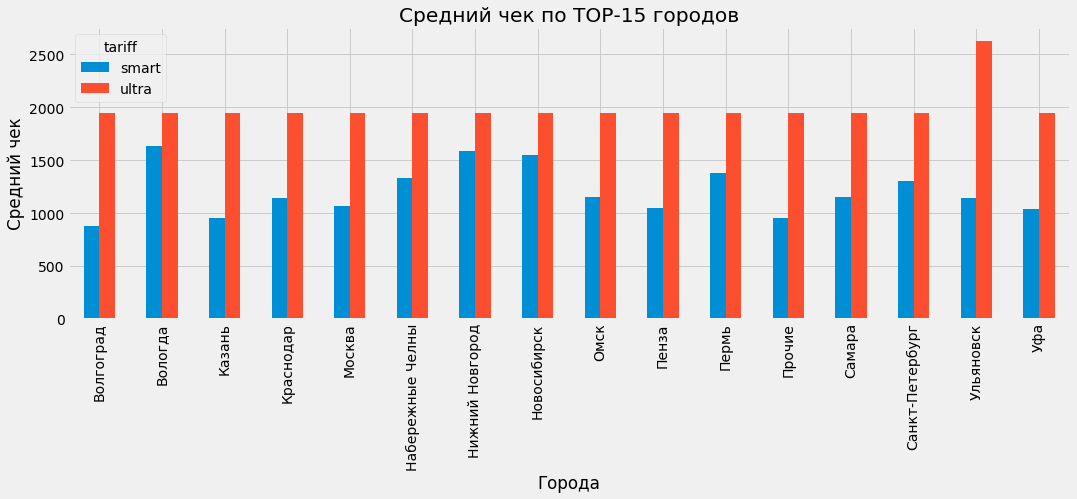

In [135]:
data.pivot_table(index='city_top15', columns='tariff', values='revenue', aggfunc='median') \
    .plot(kind='bar',rot=90,figsize=(16,5), legend=True)
plt.title('Средний чек по ТОР-15 городов')
plt.xlabel('Города')
plt.ylabel('Средний чек')
plt.show()

На Москву и Санкт-Петербург приходится только 27% общей базы клиентов из выборки.

In [136]:
print('Доля клиентов с тарифом ultra в выборке: {:.1%}'.
     format(len(data[data['tariff'] == 'ultra']['user_id'].unique()) / len(data['user_id'].unique())))

Доля клиентов с тарифом ultra в выборке: 29.8%


## Проверка гипотез <a class="anchor" id="fourth-bullet"></a>

### Гипотеза 1. Средняя выручка пользователей тарифов smart и ultra различается

Для проверки гипотезы сопоставим средние значения двух совокупностей.  
Формируем нулевую гипотезу, что средняя выручка тарифов smart и ultra не отличается. Тогда альтернативной гипотезой будет утверждение, что средняя выручка отличается. Уровень статистической значимости зададим на уровне 5%. Гипотеза будет двухсторонняя, поскольку нам важно понять наличие различие между двумя выборками, а не понять что среднее значение одной выборки меньше чем другой.

In [137]:
a = 0.05 # уровень статистической значимости
t1 = data[data['tariff'] == 'smart']['revenue']
t2 = data[data['tariff'] == 'ultra']['revenue']
results = st.ttest_ind(t1, t2, equal_var = False)
# Используем equal_var = False из-за того, что из предыдущего анализа известно, 
# что дисперсии для двух анализируемых выборок отличаются в разы (для тарифа smart 691 тыс, для тарифа ultra 143 тыс.)

print('p-значение:', results.pvalue)

if (results.pvalue < a):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.9782239771907945e-233
Отвергаем нулевую гипотезу


Полученное значение p-value очень маленькое, практически равно 0. Следовательно вероятность того, что две выборки будут на столько различаться статистически маловероятно, следовательно отвергаем нулевую гипотезу о том, что что средняя выручка на двух анализируемых тарифах не отличается. Поскольку из предыдущего анализа мы знаем, что в средняя выручка в анализируемой выборке на тарифе smart ниже, чем на тарифе ultra, практически нулевое значение p-value говорит о том, что средний чек на тарифе ultra в среднем выше.

### Гипотеза 2. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Также для проверки гипотезы проведем сопоставление средних двух совокупностей.  
Нулевая гипотеза будет свормулирована как: средняя выручка пользователей из Москвы не отличается от средней выручки пользователей из регионов. Следовательно альтернативная гипотеза будет свормулирована как: средняя выручка отличается. Уровень статистической значимости 5%. Гипотеза являетс двухсторонней.

In [138]:
a = 0.05 # уровень статистической значимости
t1 = data[data['city'] == 'Москва']['revenue']
t2 = data[data['city'] != 'Москва']['revenue']
# Проверяем дисперсию двух выборок
print(t1.var())
print(t2.var())

567396.5346784364
663536.6136305875


In [139]:
results = st.ttest_ind(t1, t2, equal_var = True)
# Используем equal_var = True из-за того, что дисперсии для двух анализируемых выборок отличаются несущественно

print('p-значение:', results.pvalue)

if (results.pvalue < a):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5767357056836234
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value высокое, гораздо выше уровня статистической значимости, следовательно отвергнуть нулевую гипотезу не удалось (средняя выручка в Москве и регионах не отличается).

## Общий вывод <a class="anchor" id="fifth-bullet"></a>

Тариф ultra в среднем на одного клиента приносит больше выручки оператору, чем тариф smart, в основном за счет высокой фиксированной абонентской платы. При этом пользователи тарифа ultra практически не превышают пакет минут и смс включенный в тариф, и в небольшом количестве случаев превышают пакет мегабайт. При этом высокий уровень абонентской платы является ограничивающим фактором для привлечения потенциальных абонентов (только 30% клиентов в выборке пользовались тарифом ultra).  При этом тариф smart наоборот привлекает клиентов относительно небольшой абонентсокй платой, на за счет небольшого ежемесячного пакета услуг включенного в тариф 75% клиентов вынуждены сверх абоненсткой платы оплачивать дополнительные услуги, в результате чего средняя выручка на клиента более чем в два раза превышает абонентскую плату.  
Для полноценной оценки выгодности того или иного тарифа для оператора требуется информация о себестоимости оказываемых услуг с учетом аллокации административно управленческих расходов, расходов на рекламу и т.д.